# Machine learning to identify types of glass.  

For this project I will determine the optimal machine learning model for us in classifying glass as one of 7 types based on its refractive index and composition.  I will test logistic regression, k-nearest neighbors, decision tree, random forest, and support vector classifier models.  The data for this project comes from the glass identification dataset from kaggle (https://www.kaggle.com/uciml/glass?select=glass.csv)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('glass.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


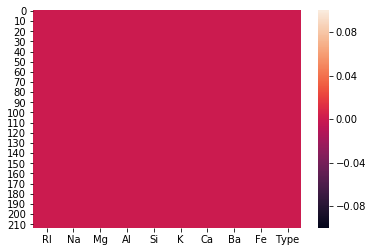

In [37]:
#check for any null values
sns.heatmap(df.isnull())

### Preprocessing

The features need to be scaled so the importance of large-scale features is not overestimated.

In [6]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

In [12]:
sc.fit(df.drop('Type', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
sc_feats=sc.transform(df.drop('Type', axis=1))
sc_df=pd.DataFrame(sc_feats, columns=df.columns[:-1])

In [106]:
#Create dataframe of scaled features
sc_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


## Machine Learning Models

In order to determine an approriate model to use in glassifying glasss types I will test several different machine learning techniques and compare their accuracy.

In [ ]:
#separate the data into training and testing sets
X=sc_df
y=df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Logistic Regression

In [60]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [161]:
#create the model, fit to the data, and test
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
lr_pred=logreg.predict(X_test)
lr_score=accuracy_score(y_test,pred)

C:\Users\sarar\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sarar\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [109]:
lrcm=(confusion_matrix(y_test, lr_pred))

In [162]:

print(classification_report(y_test,lr_pred))
print('\n')
print(lr_score)

              precision    recall  f1-score   support

           1       0.67      0.59      0.63        27
           2       0.34      0.69      0.46        16
           3       0.00      0.00      0.00         9
           5       0.75      0.60      0.67         5
           6       0.00      0.00      0.00         4
           7       0.50      0.50      0.50         4

   micro avg       0.49      0.49      0.49        65
   macro avg       0.38      0.40      0.38        65
weighted avg       0.45      0.49      0.46        65



0.6615384615384615


C:\Users\sarar\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sarar\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sarar\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### K-Nearest Neighbors

In [20]:
#import KNN
from sklearn.neighbors import  KNeighborsClassifier

First, we need to determine the appropriate number of neighbors to use in the model.  To do this, I check the error rate of k values between 1 and 20.

In [ ]:
#use for loop to check each k value and save its error-rate
e_rate=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    e_rate.append(np.mean(pred_i!=y_test))
    
    

Text(0, 0.5, 'Error-rate')

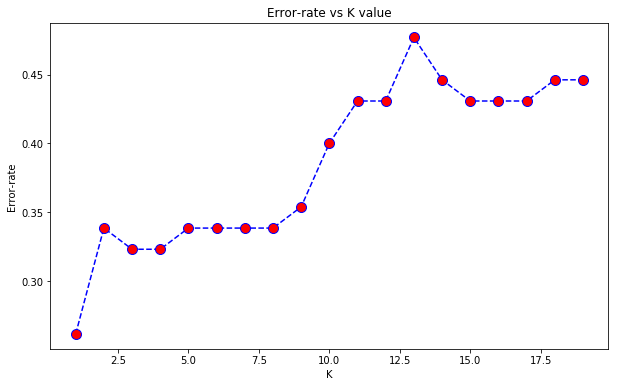

In [36]:
#plot the error-rate for each k value to determine an appropriate choice
plt.figure(figsize=(10,6))
plt.plot(range(1,20), e_rate, color='b', linestyle='--', marker='o', markerfacecolor='r', markersize=10)
plt.title('Error-rate vs K value')
plt.xlabel('K')
plt.ylabel('Error-rate')

Based on the error rates I chose to use 5 as the k value.  At k=5, the error-rate is low and the and the error-rate curve does not show any extreme jumps.

In [158]:
#use the chosen k value to create the model then fit and make predictions
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predK=knn.predict(X_test)


In [159]:
kcm=confusion_matrix(y_test, predK)
k_score=accuracy_score(y_test, predK)
k_score

0.6615384615384615

In [160]:

print(classification_report(y_test,predK))
print('\n')
print()

              precision    recall  f1-score   support

           1       0.66      0.78      0.71        27
           2       0.57      0.81      0.67        16
           3       0.00      0.00      0.00         9
           5       1.00      0.80      0.89         5
           6       0.75      0.75      0.75         4
           7       1.00      0.50      0.67         4

   micro avg       0.66      0.66      0.66        65
   macro avg       0.66      0.61      0.61        65
weighted avg       0.60      0.66      0.62        65






C:\Users\sarar\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sarar\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sarar\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Decision-Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [115]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predT=dtree.predict(X_test)

In [117]:
dtcm=confusion_matrix(y_test,predT)

In [118]:
print(classification_report(y_test,predT))
print(accuracy_score(y_test,predT))

              precision    recall  f1-score   support

           1       0.75      0.67      0.71        27
           2       0.52      0.81      0.63        16
           3       0.29      0.22      0.25         9
           5       1.00      0.60      0.75         5
           6       0.67      0.50      0.57         4
           7       0.67      0.50      0.57         4

   micro avg       0.62      0.62      0.62        65
   macro avg       0.65      0.55      0.58        65
weighted avg       0.64      0.62      0.61        65

0.6153846153846154


### Random Forest

In [120]:
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
predR=rfc.predict(X_test)

In [123]:
rfcm=confusion_matrix(y_test,predR)

In [124]:
print(classification_report(y_test,predR))
print(accuracy_score(y_test,predR))

              precision    recall  f1-score   support

           1       0.86      0.89      0.87        27
           2       0.54      0.88      0.67        16
           3       1.00      0.22      0.36         9
           5       1.00      0.60      0.75         5
           6       0.75      0.75      0.75         4
           7       1.00      0.50      0.67         4

   micro avg       0.74      0.74      0.74        65
   macro avg       0.86      0.64      0.68        65
weighted avg       0.81      0.74      0.72        65

0.7384615384615385


### Support Vector Classifier

In [95]:
from sklearn.svm import SVC

In [125]:
sMod=SVC()
sMod.fit(X_train, y_train)
predS=sMod.predict(X_test)

C:\Users\sarar\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [126]:
svccm=confusion_matrix(y_test,predS)

In [127]:
print(classification_report(y_test,predS))
print(accuracy_score(y_test,predS))

              precision    recall  f1-score   support

           1       0.68      0.78      0.72        27
           2       0.48      0.81      0.60        16
           3       0.00      0.00      0.00         9
           5       1.00      0.60      0.75         5
           6       1.00      0.50      0.67         4
           7       1.00      0.50      0.67         4

   micro avg       0.63      0.63      0.63        65
   macro avg       0.69      0.53      0.57        65
weighted avg       0.60      0.63      0.59        65

0.6307692307692307


C:\Users\sarar\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sarar\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sarar\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Conclusion

To evaluate the models we can examine the confusion matrices for each one.

In [ ]:
#arrange the confusion matrices so we can loop through them and create a list of the titles for each one
cm_all=[lrcm, kcm, dtcm,rfcm,svccm]
titles=['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVC']
#set up a counter for the subplots and titles
count=1
#plot and label each confusion matrix
plt.subplots(figsize=(12, 12))
plt.suptitle('Confusion Matrices')  
for i in cm_all:
    plt.subplot(3,2,count)
    sns.heatmap(i, annot=True,cbar=False, cmap='viridis')
    plt.title(titles[count-1])
    count+=1


In [165]:
scores=[accuracy_score(y_test,lr_pred),accuracy_score(y_test,predK), accuracy_score(y_test,predT), accuracy_score(y_test,predR),accuracy_score(y_test,predS)]

In [279]:
scoresDict = dict(zip(titles, scores))
sd=pd.DataFrame(scoresDict, index=['Accuracy']).round(3).transpose()

sd['Accuracy']=sd['Accuracy'].apply(lambda x:str(x*100)+'%')

In [280]:
sd

,Accuracy
Logistic Regression,49.2%
KNN,66.2%
Decision Tree,61.5%
Random Forest,73.8%
SVC,63.1%


The random forest method gives the highest degree of accuracy for this problem.  It correctly predicts the glass type 73.8% of the time.  The logistic regression model is the worst of the group with an accuracy of only 49.2%.